<a href="https://colab.research.google.com/github/jesronithin/hand_gesture_prediction/blob/main/hand_gesture_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [ ]:
train=pd.read_csv("/content/sign_mnist_train.csv")
test=pd.read_csv("/content/sign_mnist_test.csv")

In [ ]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
labels=train['label'].values

In [ ]:
unique_label=np.array(labels)
np.unique(unique_label)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])

<Axes: ylabel='count'>

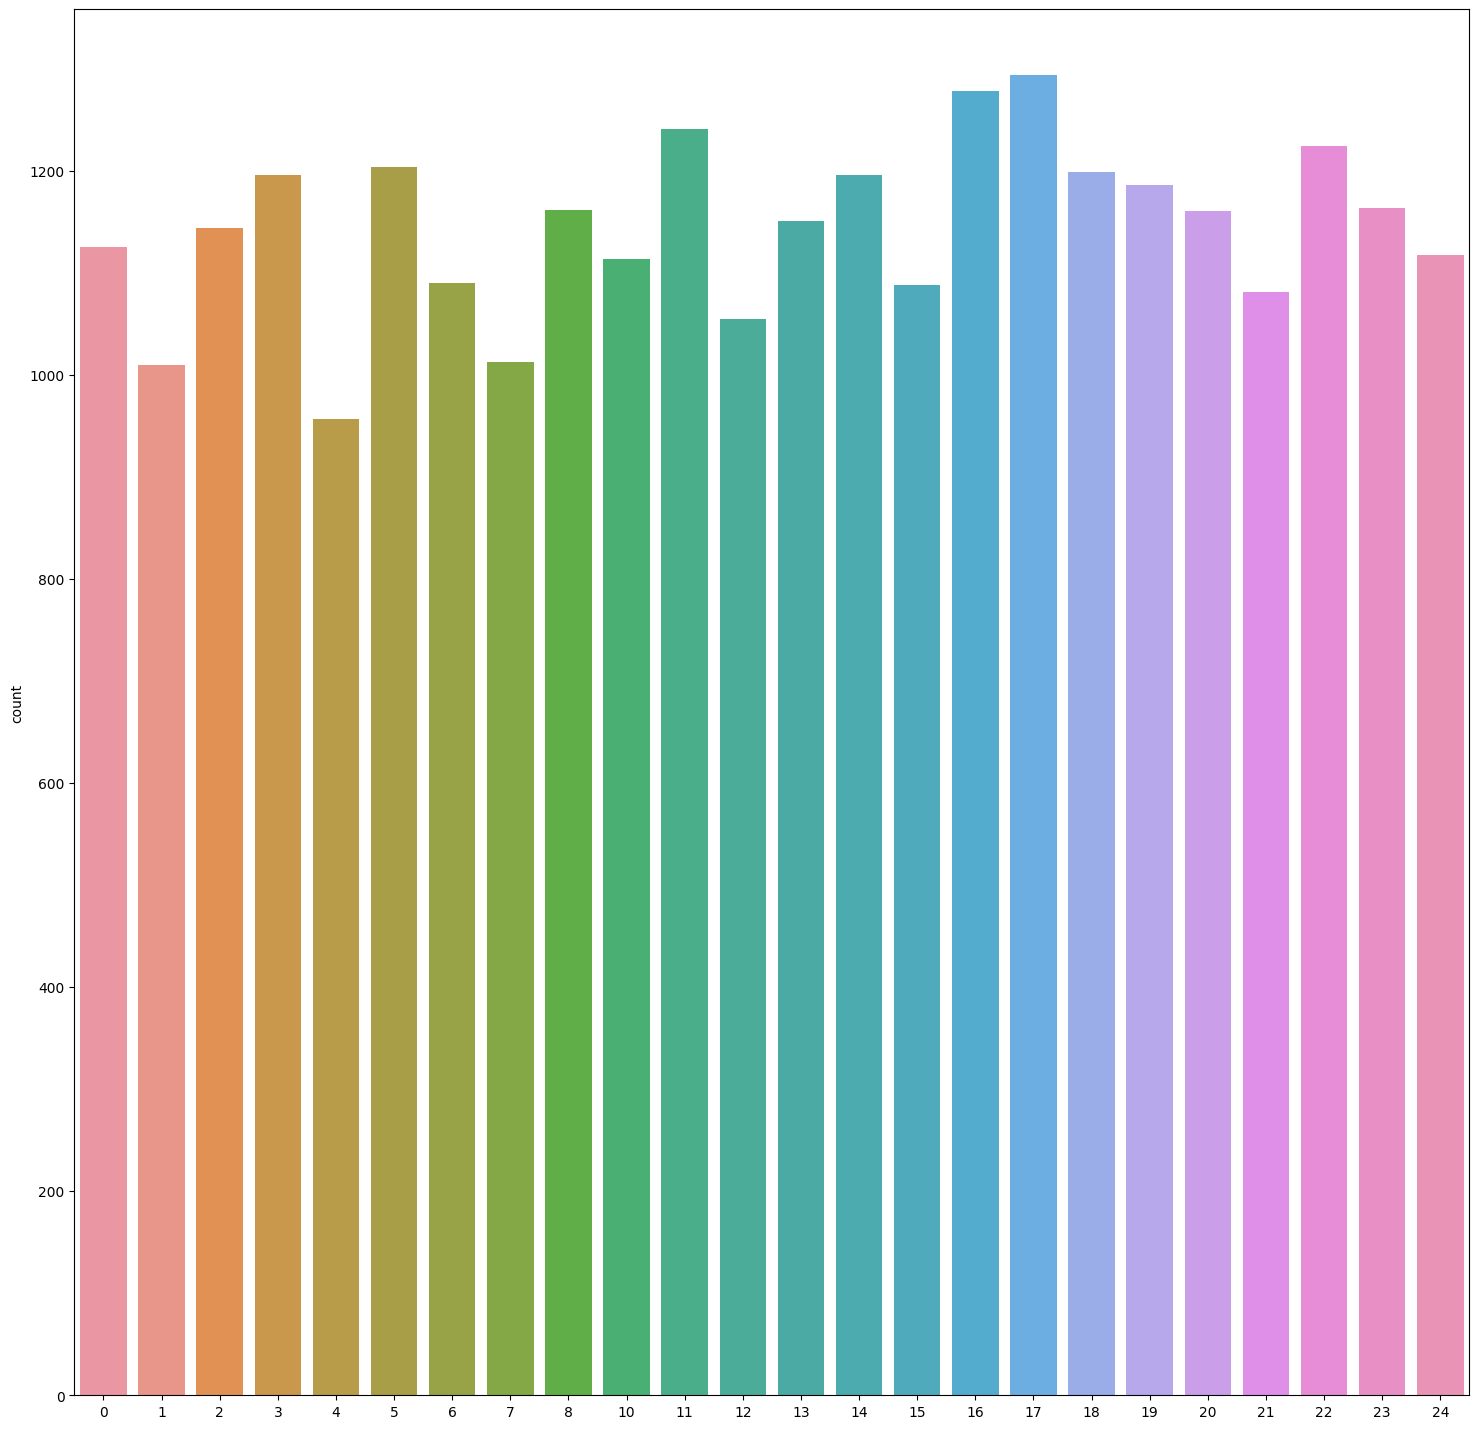

In [ ]:
plt.figure(figsize=(18,18))
sns.countplot(x=labels)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
labels=lb.fit_transform(labels)

[0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


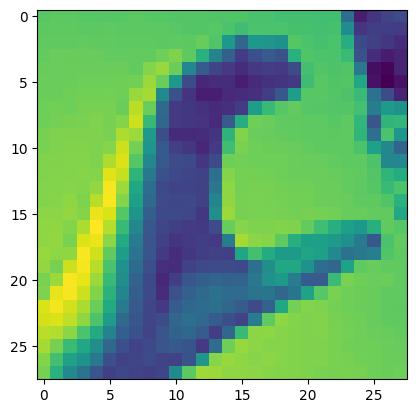

In [ ]:
index=2
print(labels[index])
plt.imshow(images[index].reshape(28,28))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Conv2D, BatchNormalization, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
y_train = train['label']
train.drop(['label'], axis=1, inplace=True)

y_test = test['label']
test.drop(['label'], axis=1, inplace=True)

In [ ]:
size = 28
channels = 1
batch = 128
epochs = 100

X_train = train.values.reshape(train.shape[0], size, size, channels)
X_test = test.values.reshape(test.shape[0], size, size, channels)

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    width_shift_range=.2,
    height_shift_range=.2,
    rotation_range=15,
    brightness_range=[0.8, 1.2],
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)

X_train = train_datagen.flow(X_train, y_train, batch_size=batch)
X_test = test_datagen.flow(X_test, y_test)

In [ ]:
Model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation="relu", input_shape=(size, size, channels)),
    MaxPool2D(2, 2, padding='same'),
    Dropout(0.25),
    Conv2D(filters=128, kernel_size=(3, 3), activation="relu"),
    MaxPool2D(2, 2, padding='same'),
    Dropout(0.25),
    Conv2D(filters=512, kernel_size=(3, 3), activation="relu"),
    MaxPool2D(2, 2, padding='same'),
    Dropout(0.25),
    Flatten(),
    Dense(units=4096, activation="relu"),
    Dropout(0.5),
    Dense(units=1024, activation="relu"),
    Dropout(0.5),
    Dense(units=25, activation="softmax"),
])

In [ ]:
Model.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=["accuracy"])
Model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 dropout_5 (Dropout)         (None, 13, 13, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 128)       36992     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 6, 6, 128)         0         
 g2D)                                                            
                                                                 
 dropout_6 (Dropout)         (None, 6, 6, 128)        

In [ ]:
checkpoint_filepath = 'best_model.hdf5'
callback_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, save_weights_only=False, monitor='val_accuracy', mode='max', save_best_only=True)
callback_learningrate = ReduceLROnPlateau(monitor='loss', mode='min', min_delta=0.01, patience=3, factor=.75, min_lr=0.00001, verbose=1)
callbacks = [callback_checkpoint, callback_learningrate]

In [ ]:
history = Model.fit(X_train, validation_data=X_test, epochs=10, callbacks=callbacks)

Epoch 1/10
215/215 [==============================] - ETA: 0s - loss: 3.1473 - accuracy: 0.0607

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


215/215 [==============================] - 219s 1s/step - loss: 3.1473 - accuracy: 0.0607 - val_loss: 2.8297 - val_accuracy: 0.1528 - lr: 0.0010
Epoch 2/10
215/215 [==============================] - 204s 950ms/step - loss: 1.9520 - accuracy: 0.3595 - val_loss: 0.6503 - val_accuracy: 0.7883 - lr: 0.0010
Epoch 3/10
215/215 [==============================] - 210s 978ms/step - loss: 0.8992 - accuracy: 0.6834 - val_loss: 0.2429 - val_accuracy: 0.9182 - lr: 0.0010
Epoch 4/10
215/215 [==============================] - 200s 931ms/step - loss: 0.5835 - accuracy: 0.7961 - val_loss: 0.1172 - val_accuracy: 0.9686 - lr: 0.0010
Epoch 5/10
215/215 [==============================] - 202s 941ms/step - loss: 0.4212 - accuracy: 0.8559 - val_loss: 0.0505 - val_accuracy: 0.9886 - lr: 0.0010
Epoch 6/10
215/215 [==============================] - 204s 945ms/step - loss: 0.3355 - accuracy: 0.8848 - val_loss: 0.0179 - val_accuracy: 0.9993 - lr: 0.0010
Epoch 7/10
215/215 [==============================] - 209s 9

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(acc))

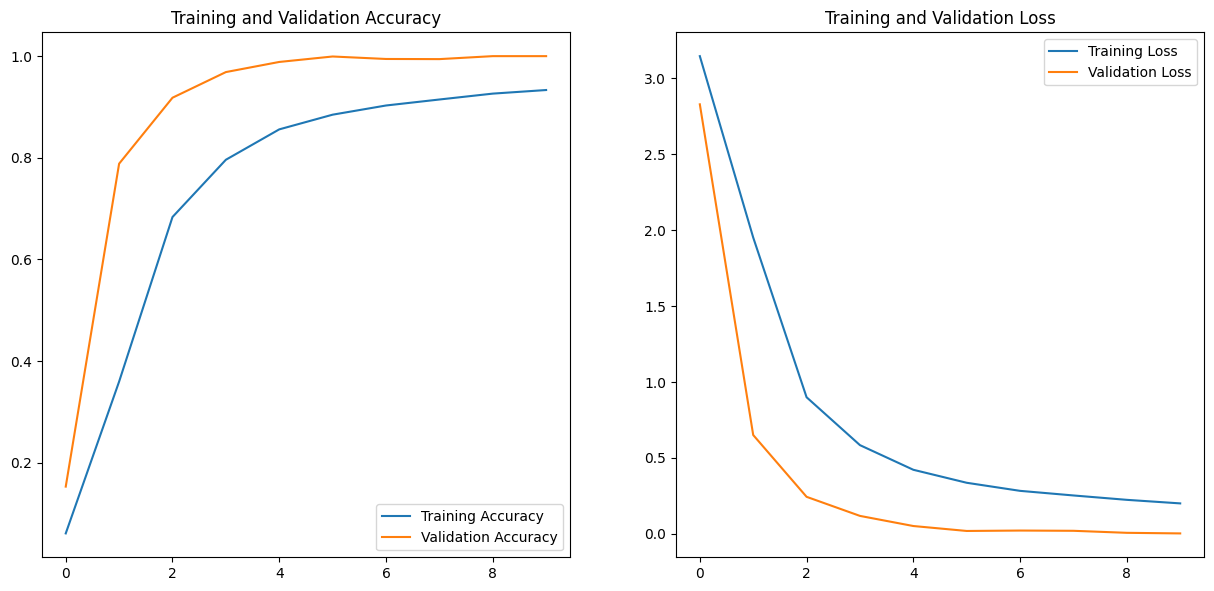

In [ ]:
plt.figure(figsize=(15, 15))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
print(f'Test Acc: {Model.evaluate(X_test)[1] * 100:.2f}%')

225/225 [==============================] - 11s 50ms/step - loss: 0.0017 - accuracy: 1.0000
Test Acc: 100.00%


225/225 [==============================] - 11s 46ms/step


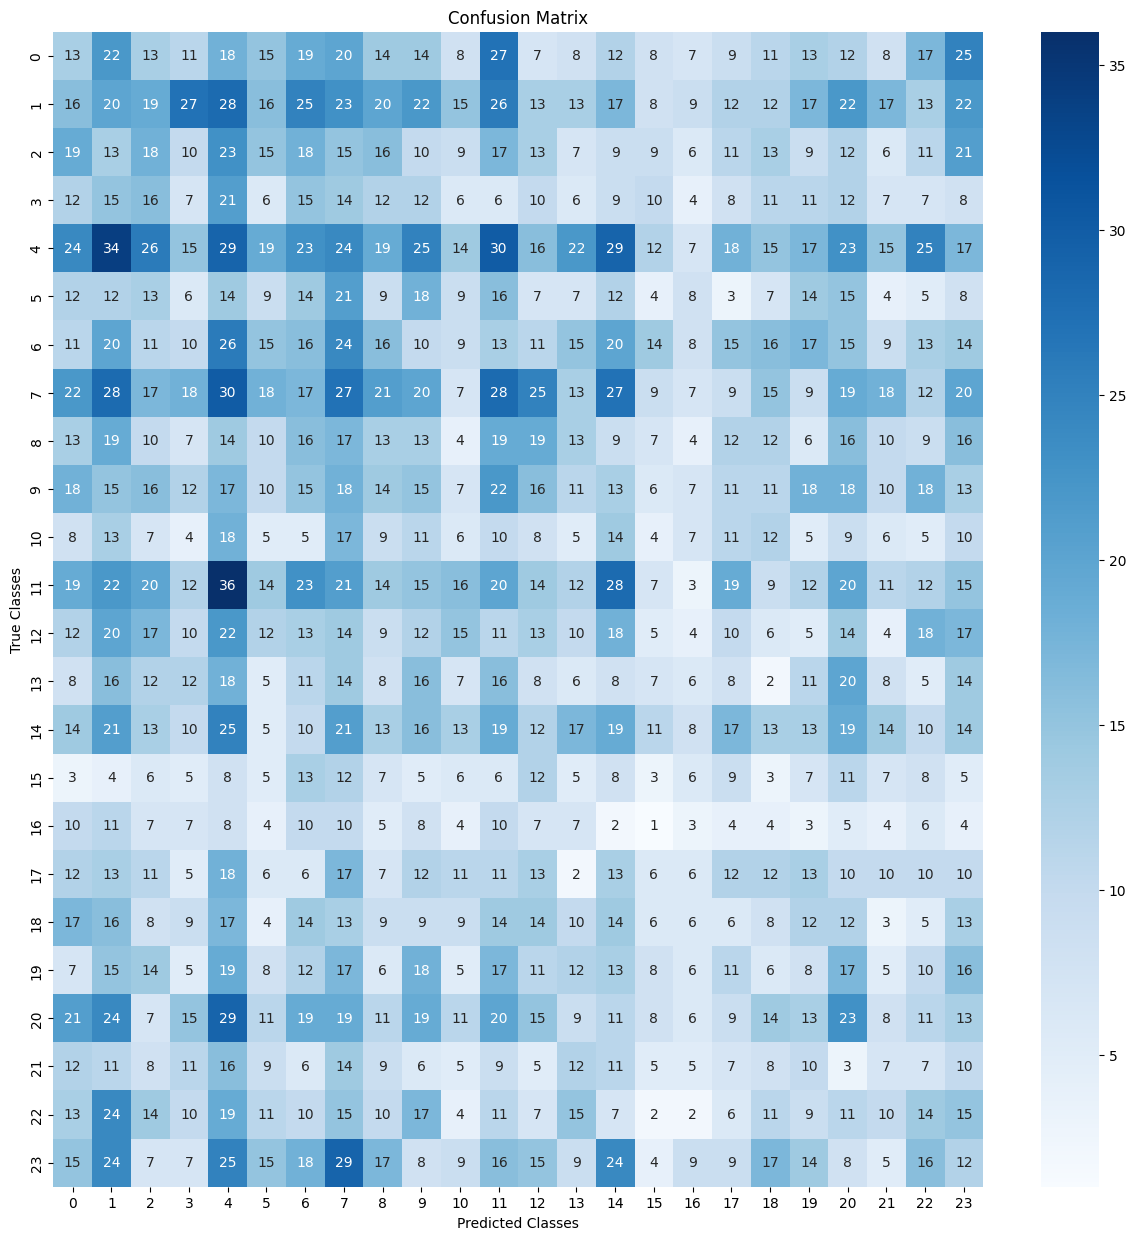

In [ ]:
y_pred = np.argmax(Model.predict(X_test), axis=1)
CM = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(15, 15))
sns.heatmap(CM, annot=True, cmap="Blues", fmt='g')
plt.xlabel("Predicted Classes")
plt.ylabel("True Classes")
plt.title("Confusion Matrix")
plt.show()

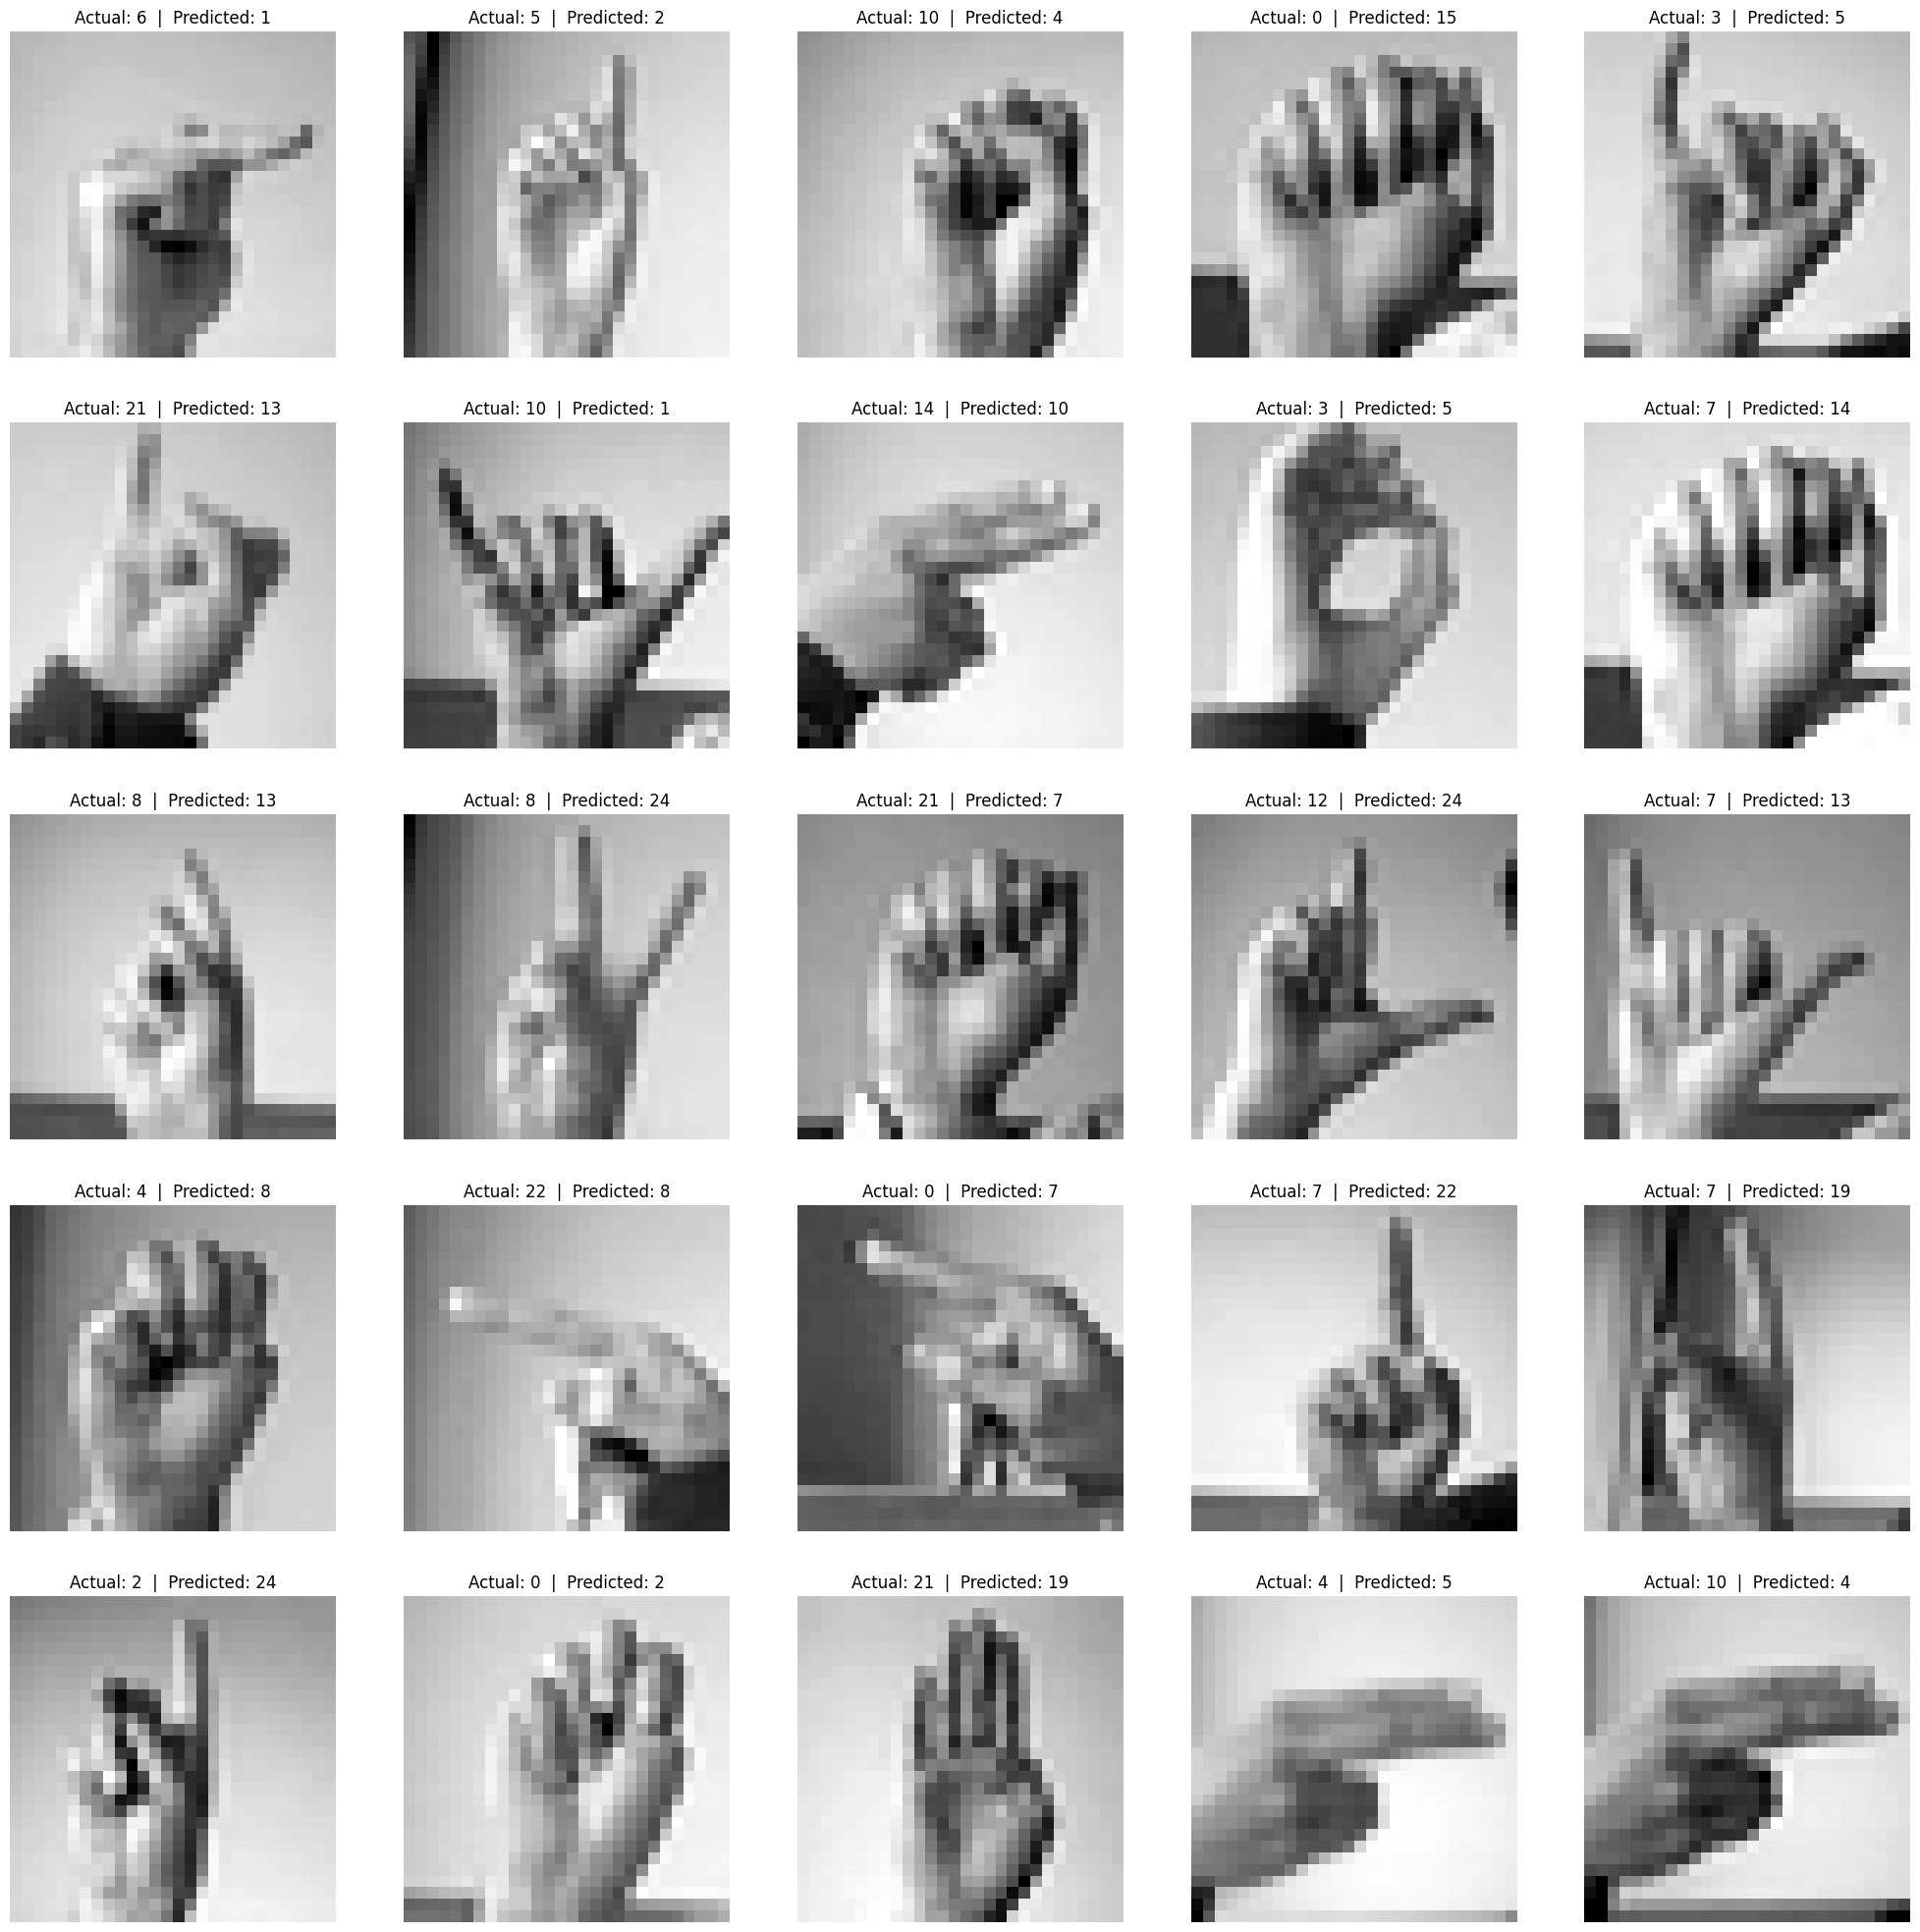

In [ ]:
plt.figure(figsize=(25, 25))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(next(X_test)[0][0, :, :, 0], cmap='gray')
    plt.title(f'Actual: {y_test[i]}  |  Predicted: {y_pred[i]}')
    plt.axis('off')
plt.show()